In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML, display
%matplotlib inline
plt.style.use('bmh') # prettier plots
plt.rcParams['figure.figsize'] = (8, 6)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
display(HTML("<style>.container { width:90% !important; }</style>"))


# Show a simple scatter plot

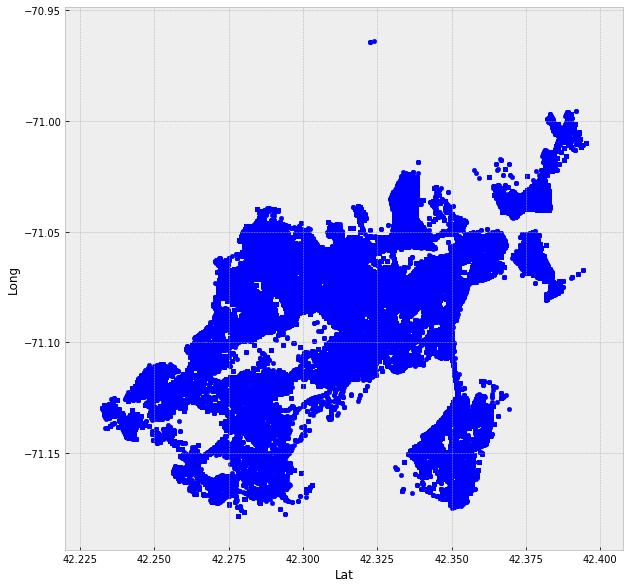

In [3]:
df = pd.read_csv('datasets/boston_crime.csv', encoding='ISO-8859-1', low_memory=False)
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].astype('datetime64[ns]') 
df = df.loc[df['Lat'] > 0]
df.plot.scatter(x='Lat', y='Long', figsize=(10,10));

# Use geopandas world or USA maps to show scatter over map

Automatically detect if all points are within continental USA and plot only USA map (this requires the folder `us-states-cartographic-boundary-shapefiles`) to work

In [11]:
import geopandas
from shapely.geometry import Point
import geoplot as gpd
import shapely
shapely.speedups.enable()

def plot_df(ax, df, title):
    def all_all_points_in_usa(seq):
        """Expects a iterator to lat, lon tuples"""
        top = 49.3457868 # north lat
        left = -124.7844079 # west long
        right = -66.9513812 # east long
        bottom =  24.7433195 # south lat
        return all(bottom <= lat <= top and left <= lon <= right for lat, lon in seq)

    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Long, df.Lat))

    usa_only = all_all_points_in_usa(zip(df.Lat, df.Long))

    if usa_only:
        map = geopandas.read_file("us-states-cartographic-boundary-shapefiles/cb_2016_us_state_500k.shp")
        map = map[map.STATEFP.astype(int) < 60]
        map = map[~map.NAME.isin(['Hawaii', 'Alaska'])]
    else:
        map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    ax = map.plot(ax=ax, color='lightgrey', linewidth=0.5, edgecolor='white')
    ax.set_title("{} ({})".format(title, "USA ONLY" if usa_only else "WORLD"))
    ax.axis('off')

    gdf.plot(ax=ax, color='blue', markersize=10)



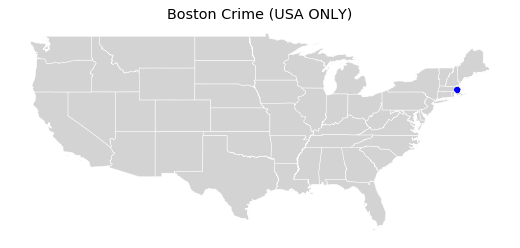

In [12]:
df = pd.read_csv('datasets/boston_crime.csv', encoding='ISO-8859-1', low_memory=False).dropna().sample(1000)

fig, ax = plt.subplots(figsize=(10,4))
plot_df(ax, df, title='Boston Crime')



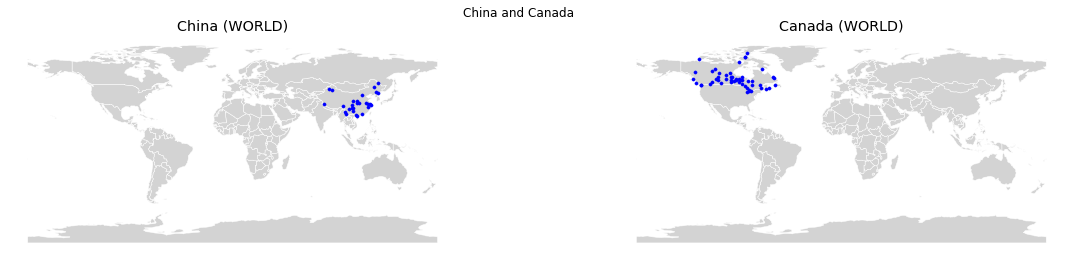

In [13]:
df = pd.read_csv('datasets/airports.csv', low_memory=False).dropna().sample(1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
fig.suptitle('China and Canada')

plot_df(ax1, df.loc[df['Country'] == 'China'], title='China')
plot_df(ax2, df.loc[df['Country'] == 'Canada'], title='Canada')